In [223]:
import os
import pandas as pd

In [224]:
df = pd.read_csv('../Datasets/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [225]:
sms_df = df[['v1','v2']]
sms_df = sms_df.rename(columns={'v1':'label','v2':'SMS'})
sms_df.head(2)

,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [226]:
sms_df.isnull().sum() # Checking null values

label    0
SMS      0
dtype: int64

In [227]:
sms_df.shape

(5572, 2)

In [228]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [229]:
sms_df.values

array([['ham',
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['ham', 'Ok lar... Joking wif u oni...'],
       ['spam',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['ham',
        'Pity, * was in mood for that. So...any other suggestions?'],
       ['ham',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['ham', 'Rofl. Its true to its name']], dtype=object)

## Pre Processing

In [230]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# nltk.download('stopwords')
stop_words = stopwords.words('english')

In [231]:
#Changing label values to numerical

sms_df['label'] = sms_df['label'].map({'spam':1,'ham':0})
sms_df

,label,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [232]:
# Cleanup

# replace email address with 'emailaddress'
sms_df['SMS'] = sms_df['SMS'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# replace urls with 'webaddress'
sms_df['SMS'] = sms_df['SMS'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# replace money symbol with 'money-symbol'
sms_df['SMS'] = sms_df['SMS'].str.replace(r'£|\$', 'money-symbol')

# replace 10 digit phone number with 'phone-number'
sms_df['SMS'] = sms_df['SMS'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')

# replace normal number with 'number'
sms_df['SMS'] = sms_df['SMS'].str.replace(r'\d+(\.\d+)?', 'number')

# remove punctuation
sms_df['SMS'] = sms_df['SMS'].str.replace(r'[^\w\d\s]', ' ')

# remove whitespace between terms with single space
sms_df['SMS'] = sms_df['SMS'].str.replace(r'\s+', ' ')

# remove leading and trailing whitespace
sms_df['SMS'] = sms_df['SMS'].str.replace(r'^\s+|\s*?$', ' ')

# change words to lower case
sms_df['SMS'] = sms_df['SMS'].str.lower()

In [233]:
sms_df.values

array([[0,
        'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'],
       [0, 'ok lar... joking wif u oni...'],
       [1,
        "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's"],
       ...,
       [0, 'pity, * was in mood for that. so...any other suggestions?'],
       [0,
        "the guy did some bitching but i acted like i'd be interested in buying something else next week and he gave it to us for free"],
       [0, 'rofl. its true to its name']], dtype=object)

In [234]:
# Apply stop words
sms_df['SMS'] = sms_df['SMS'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [235]:
# Apply Stemming
from nltk.stem import SnowballStemmer
sn_stem = SnowballStemmer('english')
sms_df['SMS'] = sms_df['SMS'].apply(lambda x: ' '.join(sn_stem.stem(word) for word in x.split()))

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tfdif_vec = tf.fit_transform(sms_df['SMS'])
tfdif_vec = tfdif_vec.toarray()
tfdif_data_df = pd.DataFrame(tfdif_vec) 
tfdif_data_df

,0,1,2,3,4,5,6,7,8,9,...,8148,8149,8150,8151,8152,8153,8154,8155,8156,8157
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Defining Train and Test Data

In [237]:
sms_train = tfdif_data_df[:4500]
sms_test = tfdif_data_df[4501:]
target = sms_df['label']
sms_train
target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tfdif_data_df,sms_df['label'],test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4457, 8158), (1115, 8158), (4457,), (1115,))

## Fitting the Multinomial Naive Bayes to the Training set

In [238]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train,y_train)

MultinomialNB()

In [239]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import KFold,GridSearchCV

params = {'alpha': [0.01, 0.1, 0.19, 0.195, 0.18, 0.17, 0.21, 0.22, 0.23, 0.24, 0.2, 0.3, 0.5, 1.0, 2, 3, 4, 10.0]}

cv = KFold(n_splits=18, random_state=42, shuffle=True)
clf = GridSearchCV(nb_model, params, cv=cv, n_jobs=-1, scoring='accuracy')

clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=18, random_state=42, shuffle=True),
             estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.19, 0.195, 0.18, 0.17, 0.21,
                                   0.22, 0.23, 0.24, 0.2, 0.3, 0.5, 1.0, 2, 3,
                                   4, 10.0]},
             scoring='accuracy')

In [240]:
# Using this class to make my print statement look bold
class color:
    BOLD = '\033[1m'

In [241]:
y_pred = clf.predict(X_test)
print(color.BOLD +'Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
print('-----------------------------------------------------------------------')
print(color.BOLD +'Accuracy Score: (TP + TN)/(no of observations) is (961+136)/(1115) i.e. ', accuracy_score(y_test,y_pred))
print('-----------------------------------------------------------------------')


Confusion Matrix:
 [[961   4]
 [ 14 136]]
-----------------------------------------------------------------------
Accuracy Score: (TP + TN)/(no of observations) is (961+136)/(1115) i.e.  0.9838565022421525
-----------------------------------------------------------------------


## Key metrics:
### Precision:

Precision tells you how many of the predicted positive instances (fraud SMS in your case) are actually correct. It answers the question: Of all the instances that were predicted as fraud (1), how many were actually fraud?
Precision for Class 0 (non-fraud): 0.99 means that 99% of the instances predicted as non-fraud were indeed non-fraud.
Precision for Class 1 (fraud): 0.97 means that 97% of the instances predicted as fraud were indeed fraud.

### Recall:

Recall measures how well the model identifies all the positive instances in the data. It answers the question: Of all the actual fraud instances (1), how many did the model correctly identify?
Recall for Class 0 (non-fraud): 1.00 means that the model correctly identified 100% of the non-fraud SMS messages.
Recall for Class 1 (fraud): 0.91 means that the model correctly identified 91% of the fraud SMS messages.
### F1-Score:

The F1-score is the harmonic mean of precision and recall. It combines both precision and recall into a single metric and is useful when you want to balance the trade-off between precision and recall.
F1-score for Class 0 (non-fraud): 0.99 indicates excellent performance in terms of precision and recall for non-fraud instances.
F1-score for Class 1 (fraud): 0.94 indicates a good balance between precision and recall for fraud instances, but it is slightly lower than for non-fraud, indicating room for improvement in identifying fraud.

### Support:

Support refers to the number of true instances for each class in the dataset.
Support for Class 0 (non-fraud): 965 instances in the dataset are non-fraud.
Support for Class 1 (fraud): 150 instances in the dataset are fraud.

### Accuracy:
The accuracy is the overall percentage of correct predictions (both fraud and non-fraud) out of all predictions.
In your case, the accuracy is 0.98, meaning 98% of the model's predictions are correct.

### Averages:
#### Macro Average:

The macro average calculates the metric (precision, recall, F1) independently for each class and then averages them. This gives equal weight to each class, regardless of how many instances each class has.
Macro avg precision: 0.98
Macro avg recall: 0.95
Macro avg F1-score: 0.96
The macro average tells you how the model is performing across classes, treating both fraud and non-fraud equally, despite the class imbalance (more non-fraud than fraud).

#### Weighted Average:

The weighted average takes into account the number of instances for each class when calculating the average. This means that classes with more instances (like non-fraud) will have a greater influence on the average.
Weighted avg precision: 0.98
Weighted avg recall: 0.98
Weighted avg F1-score: 0.98
The weighted averages reflect the model's performance on the overall dataset, accounting for the class imbalance.

In [242]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print('f1 score calculation -> F1 =(2*Precision*Recall)/(Precision+Recall)')
print('Precision -> TP/(TP+FP) and Recall is -> TP/(TP+FN)')
print(color.BOLD + 'F1 Score is ',round(f1,2))
print('-----------------------------------------------------------------------')
print(color.BOLD +'Classification Report:')
print(classification_report(y_test,y_pred))

f1 score calculation -> F1 =(2*Precision*Recall)/(Precision+Recall)
Precision -> TP/(TP+FP) and Recall is -> TP/(TP+FN)
F1 Score is  0.94
-----------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.97      0.91      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [243]:
print(f'Training Accuracy: {clf.score(X_train,y_train)}')
print(f'Test Accuracy: {clf.score(X_test,y_test)}')
print(f"Best Score through Grid Search {clf.best_score_}")
print(f"Best Param through Grid Search {clf.best_params_}")

Training Accuracy: 0.9957370428539376
Test Accuracy: 0.9838565022421525
Best Score through Grid Search 0.9849647381480998
Best Param through Grid Search {'alpha': 0.2}


## ROC Curve:

The ROC curve plots the relationship between the False Positive Rate (FPR) and True Positive Rate (TPR) (Recall). The curve helps evaluate the trade-off between sensitivity and specificity at different decision thresholds.
A curve close to the top-left corner indicates a better model (high TPR and low FPR).

## AUC Score:

An AUC score of 0.95 means your model performs well, as it is able to distinguish between fraud and non-fraud messages with a high degree of accuracy.
An AUC score closer to 1 indicates better classification performance. If it were 0.5, it would indicate random guessing.

In [244]:
from sklearn.metrics import roc_curve,roc_auc_score


fpr,tpr,threshold = roc_curve(y_test,y_pred,pos_label=1)
#print(fpr,tpr,threshold)
random_prob =[0 for i in range(len(y_test))]

p_fpr,p_tpr,p_threshold = roc_curve(y_test,random_prob,pos_label=1)
print(p_fpr,p_tpr,p_threshold)

auc_score = roc_auc_score(y_test,y_pred)
print(f"auc_score is {round(auc_score,2)}")

[0. 1.] [0. 1.] [inf  0.]
auc_score is 0.95


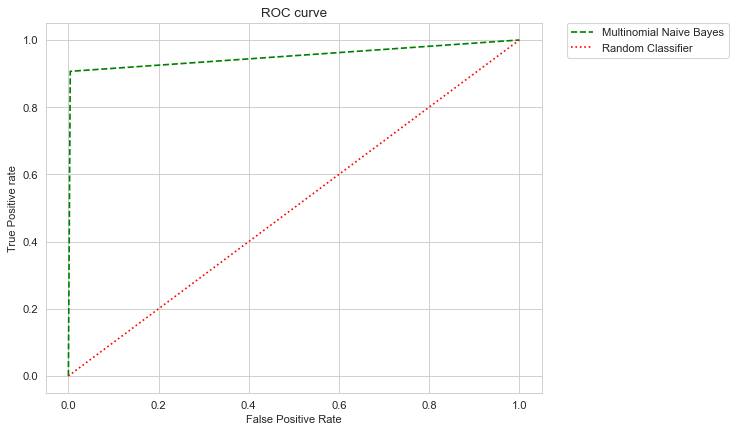

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

sns.set_style("whitegrid")
figure(figsize=(8,6),dpi=80)

plt.plot(fpr,tpr,linestyle='--', color='green', label='Multinomial Naive Bayes')
plt.plot(p_fpr,p_tpr,linestyle=':',color='red',label='Random Classifier')

# Title
plt.title('ROC curve')

# X-label
plt.xlabel('False Positive Rate')

# Y-label
plt.ylabel('True Positive rate')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Light GBM

In [246]:
import lightgbm as lgb

def train_and_test(model,model_name):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    f2 = round(f1_score(y_test,pred),3)
    print(f"f2 score is {f2}")

for depth in range(1,15):
    lgb_model = lgb.LGBMClassifier(max_depth=depth,n_estimators=200,alpha=0.1,num_leaves=74)
    print(f"Max depth {depth}")
    train_and_test(lgb_model,'Light GBM')


Max depth 1
[LightGBM] [Info] Number of positive: 597, number of negative: 3860
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7530
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 389
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.133947 -> initscore=-1.866505
[LightGBM] [Info] Start training from score -1.866505
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [247]:
y_pred = lgb_model.predict(X_test)
print(color.BOLD + ' Confusion Matrix \n' , confusion_matrix(y_test,y_pred))

print(color.BOLD + ' Accuracy Score \n' , accuracy_score(y_test,y_pred))


print(color.BOLD + ' F1 Score \n' , f1_score(y_test,y_pred))


print(color.BOLD + ' Classification Report \n' , classification_report(y_test,y_pred))



 Confusion Matrix 
 [[958   7]
 [ 15 135]]
 Accuracy Score 
 0.9802690582959641
 F1 Score 
 0.9246575342465754
 Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.95      0.90      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Naive Bayes Model F1 Score is  0.94 and Light GBM Model F1 Score is just 0.92 as per above analysis

In [248]:
print('Training Accuracy : %.3f' %lgb_model.score(X_train, y_train))
print('Test Accuracy : %.3f' %lgb_model.score(X_test, y_test))

Training Accuracy : 1.000
Test Accuracy : 0.980


In [249]:
from sklearn.metrics import roc_curve,roc_auc_score


fpr,tpr,threshold = roc_curve(y_test,y_pred,pos_label=1)
#print(fpr,tpr,threshold)
random_prob =[0 for i in range(len(y_test))]

p_fpr,p_tpr,p_threshold = roc_curve(y_test,random_prob,pos_label=1)
print(p_fpr,p_tpr,p_threshold)

auc_score = roc_auc_score(y_test,y_pred)
print(f"auc_score is {round(auc_score,2)}")

[0. 1.] [0. 1.] [inf  0.]
auc_score is 0.95


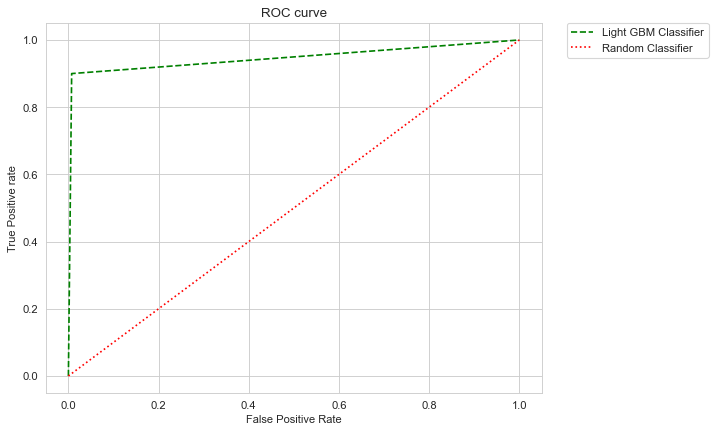

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

sns.set_style("whitegrid")
figure(figsize=(8,6),dpi=80)

plt.plot(fpr,tpr,linestyle='--', color='green', label='Light GBM Classifier')
plt.plot(p_fpr,p_tpr,linestyle=':',color='red',label='Random Classifier')

# Title
plt.title('ROC curve')

# X-label
plt.xlabel('False Positive Rate')

# Y-label
plt.ylabel('True Positive rate')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Save Best Model

In [253]:
import joblib
# Save Naive Bayes Model using joblib
joblib.dump(clf,'SMS_Spam_Detection_NB_Model.pkl')

['SMS_Spam_Detection_NB_Model.pkl']

In [252]:
# Save TFDIF Model using joblib
joblib.dump(tf,'TF_DIF.pkl')

['TF_DIF.pkl']